In [329]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model # for linear regression modeling
from sklearn import preprocessing # for preprocessing like imputting missing values
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

# libraries

import pickle

In [330]:
%matplotlib inline

In [331]:
df=pd.read_csv('combined_prop_UPDATE_diam.csv')

In [332]:
df.head()

Unnamed: 0  Unnamed: 0.1    V     J      Pe      Ct      Cp    PWR Torque  \
0           0             0    0     0       0   0.144   0.069  0.001  0.087   
1           1             1  0.4  0.03  0.0645  0.1416  0.0693  0.001  0.087   
2           2             2  0.7  0.06  0.1262   0.139  0.0694  0.001  0.088   
3           3             3  1.1  0.09  0.1851   0.136  0.0695  0.001  0.088   
4           4             4  1.4  0.13  0.2412  0.1328  0.0694  0.001  0.088   

  Thrust   RPM        model  diameter  
0  0.095  1000  PER3_12x6SF        12  
1  0.094  1000  PER3_12x6SF        12  
2  0.092  1000  PER3_12x6SF        12  
3   0.09  1000  PER3_12x6SF        12  
4  0.088  1000  PER3_12x6SF        12

In [333]:
df.V=pd.to_numeric(df.V, errors='coerce')

In [334]:
df['wind_speed_km/h']=(df.V/10)+10

In [335]:
df.head(50)

Unnamed: 0  Unnamed: 0.1     V     J       Pe       Ct      Cp    PWR  \
0            0             0   0.0     0        0    0.144   0.069  0.001   
1            1             1   0.4  0.03   0.0645   0.1416  0.0693  0.001   
2            2             2   0.7  0.06   0.1262    0.139  0.0694  0.001   
3            3             3   1.1  0.09   0.1851    0.136  0.0695  0.001   
4            4             4   1.4  0.13   0.2412   0.1328  0.0694  0.001   
5            5             5   1.8  0.16   0.2942   0.1293  0.0693  0.001   
6            6             6   2.1  0.19   0.3441   0.1254  0.0689  0.001   
7            7             7   2.5  0.22   0.3906   0.1212  0.0685  0.001   
8            8             8   2.9  0.25   0.4336   0.1163  0.0677  0.001   
9            9             9   3.2  0.28   0.4729   0.1112  0.0667  0.001   
10          10            10   3.6  0.32   0.5087   0.1059  0.0657  0.001   
11          11            11   3.9  0.35   0.5409   0.1005  0.0644  0.001   
12          12            12   4.3  0.38   0.5695    0.095  0.0631  0.001   
13          13            13   4.7  0.41   0.5947   0.0894  0.0616  0.001   
14          14            14   5.0  0.44   0.6167   0.0836  0.0598  0.001   
15          15            15   5.4  0.47   0.6351   0.0776  0.0578  0.001   
16          16            16   5.7   0.5   0.6512   0.0714  0.0553  0.001   
17          17            17   6.1  0.54   0.6639   0.0649  0.0524  0.001   
18          18            18   6.4  0.57   0.6754   0.0602  0.0506  0.001   
19          19            19   6.8   0.6   0.6833   0.0554  0.0486  0.001   
20          20            20   7.2  0.63   0.6856   0.0497  0.0457  0.001   
21          21            21   7.5  0.66   0.6806    0.043  0.0418  0.001   
22          22            22   7.9  0.69   0.6662   0.0363  0.0378  0.001   
23          23            23   8.2  0.73   0.6431   0.0307  0.0347  0.001   
24          24            24   8.6  0.76   0.6194   0.0278   0.034  0.001   
25          25            25   9.0  0.79   0.5926   0.0261  0.0347  0.001   
26          26            26   9.3  0.82   0.5398    0.022  0.0334  0.001   
27          27            27   9.7  0.85   0.4378   0.0152  0.0295  0.001   
28          28            28  10.0  0.88   0.2608   0.0073  0.0247      0   
29          29            29  10.4  0.91  -0.0307  -0.0007  0.0201      0   
30          30            30   0.0     0        0   0.1463  0.0692  0.011   
31          31            31   0.6  0.03   0.0587   0.1444  0.0696  0.011   
32          32            32   1.3  0.06   0.1151   0.1423    0.07  0.011   
33          33            33   1.9  0.08    0.169     0.14  0.0704  0.011   
34          34            34   2.6  0.11   0.2205   0.1374  0.0706  0.011   
35          35            35   3.2  0.14   0.2696   0.1347  0.0708  0.011   
36          36            36   3.9  0.17   0.3161   0.1317  0.0708  0.011   
37          37            37   4.5   0.2     0.36   0.1285  0.0708  0.011   
38          38            38   5.1  0.23   0.4012    0.125  0.0706  0.011   
39          39            39   5.8  0.25   0.4394   0.1209  0.0701  0.011   
40          40            40   6.4  0.28   0.4748   0.1167  0.0696  0.011   
41          41            41   7.1  0.31   0.5073   0.1123   0.069  0.011   
42          42            42   7.7  0.34   0.5371   0.1078  0.0682  0.011   
43          43            43   8.4  0.37   0.5641   0.1032  0.0673  0.011   
44          44            44   9.0   0.4   0.5885   0.0983  0.0662  0.011   
45          45            45   9.7  0.42   0.6104   0.0932  0.0649   0.01   
46          46            46  10.3  0.45   0.6296    0.088  0.0633   0.01   
47          47            47  10.9  0.48   0.6462   0.0827  0.0616   0.01   
48          48            48  11.6  0.51   0.6601   0.0772  0.0596   0.01   
49          49            49  12.2  0.54   0.6716   0.0714  0.0572  0.009   

   Torque Thrust   RPM        model  diameter  wind_speed_km/h  
0   0.087  

In [336]:
#df['Wind Speed in m/s']=df['Wind Speed']* 0.277778

In [337]:
df['wind_dir']=np.random.randint(2, 35, size=df.shape[0])*10

In [338]:
#to create random values for height column
dct = {4: [35, 45], 5: [45, 50], 6: [40, 65], 7: [45, 75], 8: [35, 85], 9: [45, 90], 10: [55, 125], 11: [45, 150], 12: [85, 165], 13: [75, 175], 14: [85, 175], 15: [95, 190]}

def height(diam):
    return np.random.randint(*dct[diam])

df['max_height_10sec_feet'] = df.diameter.map(height)

In [339]:
#to create random values for weight column
dct1 = {4: [3, 5], 5: [3.5, 5.5], 6: [4, 5.5], 7: [5, 7.5], 8: [5.5, 8], 9: [5.5, 8.5], 10: [5.5, 9.5], 11: [4.5, 10], 12: [5.5, 10.5], 13: [5.5, 11.5], 14: [6.5, 11.5], 15: [5.5, 12]}

def payload(diam):
    return np.random.uniform(*dct1[diam])

df['max_payload_kg'] = df.diameter.map(payload)

In [340]:
df=df.drop('V',1)

In [341]:
df

Unnamed: 0  Unnamed: 0.1     J      Pe      Ct      Cp    PWR Torque  \
0                0             0     0       0   0.144   0.069  0.001  0.087   
1                1             1  0.03  0.0645  0.1416  0.0693  0.001  0.087   
2                2             2  0.06  0.1262   0.139  0.0694  0.001  0.088   
3                3             3  0.09  0.1851   0.136  0.0695  0.001  0.088   
4                4             4  0.13  0.2412  0.1328  0.0694  0.001  0.088   
...            ...           ...   ...     ...     ...     ...    ...    ...   
154033      154033        154033  0.84   0.724  0.0417  0.0481   3.57  9.001   
154034      154034        154034  0.87  0.6822  0.0328  0.0417  3.096  7.806   
154035      154035        154035   0.9  0.6028  0.0235  0.0351  2.608  6.575   
154036      154036        154036  0.94  0.4351  0.0126  0.0271   2.01  5.068   
154037      154037        154037  0.97  0.0038  0.0001   0.018  1.338  3.373   

       Thrust    RPM        model  diameter  wind_speed_km/h  wind_dir  \
0       0.095   1000  PER3_12x6SF        12            10.00       190   
1       0.094   1000  PER3_12x6SF        12            10.04        90   
2       0.092   1000  PER3_12x6SF        12            10.07       250   
3        0.09   1000  PER3_12x6SF        12            10.11       110   
4       0.088   1000  PER3_12x6SF        12            10.14       310   
...       ...    ...          ...       ...              ...       ...   
154033  5.446  25000     PER3_9x7         9            27.80       300   
154034  4.279  25000     PER3_9x7         9            28.51       260   
154035  3.067  25000     PER3_9x7         9            29.22       320   
154036  1.646  25000     PER3_9x7         9            29.94       270   
154037  0.009  25000     PER3_9x7         9            30.65       150   

        max_height_10sec_feet  max_payload_kg  
0                          96        7.951450  
1                         138        9.984433  
2                          91        6.251667  
3                         128        7.880400  
4                          85        7.597923  
...                       ...             ...  
154033                     77        6.297045  
154034                     55        6.780330  
154035                     87        8.209758  
154036                     75        6.574712  
154037                     61        6.961049  

[154038 rows x 16 columns]

In [342]:
df.rename(columns={'J':'advance_ratio','Ct':'thrust_coef', 'Cp':'power_coef', 'Pe':'efficiency','diameter':'prop_diam'}, inplace=True)

In [440]:
#df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1)

In [344]:
df=df[['wind_speed_km/h','wind_dir','advance_ratio','thrust_coef','power_coef','PWR',
       'Torque','Thrust','RPM', 'model', 'prop_diam','max_height_10sec_feet','max_payload_kg','efficiency']]

In [389]:
df.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM  model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000     77         12                     96   
1   0.087   0.094  1000     77         12                    138   
2   0.088   0.092  1000     77         12                     91   
3   0.088   0.090  1000     77         12                    128   
4   0.088   0.088  1000     77         12                     85   

   max_payload_kg  efficiency  
0        7.951450      0.0000  
1        9.984433      0.0645  
2        6.251667      0.1262  
3        7.880400      0.1851  
4        7.597923      0.2412

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154038 entries, 0 to 154037
Data columns (total 14 columns):
wind_speed_km/h          153632 non-null float64
wind_dir                 154038 non-null int32
advance_ratio            153819 non-null object
thrust_coef              153819 non-null object
power_coef               153819 non-null object
PWR                      153819 non-null object
Torque                   153819 non-null object
Thrust                   153819 non-null object
RPM                      154038 non-null int64
model                    154038 non-null object
prop_diam                154038 non-null int64
max_height_10sec_feet    154038 non-null int64
max_payload_kg           154038 non-null float64
efficiency               153819 non-null object
dtypes: float64(2), int32(1), int64(3), object(8)
memory usage: 15.9+ MB


In [347]:
df.advance_ratio=pd.to_numeric(df.advance_ratio,errors='coerce')
df.thrust_coef=pd.to_numeric(df.thrust_coef,errors='coerce')
df.power_coef=pd.to_numeric(df.power_coef,errors='coerce')
df.PWR=pd.to_numeric(df.PWR,errors='coerce')
df.Torque=pd.to_numeric(df.Torque,errors='coerce')
df.Thrust=pd.to_numeric(df.Thrust,errors='coerce')
df.efficiency=pd.to_numeric(df.efficiency,errors='coerce')


In [348]:
df.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM        model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000  PER3_12x6SF         12                     96   
1   0.087   0.094  1000  PER3_12x6SF         12                    138   
2   0.088   0.092  1000  PER3_12x6SF         12                     91   
3   0.088   0.090  1000  PER3_12x6SF         12                    128   
4   0.088   0.088  1000  PER3_12x6SF         12                     85   

   max_payload_kg  efficiency  
0        7.951450      0.0000  
1        9.984433      0.0645  
2        6.251667      0.1262  
3        7.880400      0.1851  
4        7.597923      0.2412

In [349]:
df.efficiency=np.abs(df.efficiency)

In [350]:
df.describe()

wind_speed_km/h       wind_dir  advance_ratio    thrust_coef  \
count    153632.000000  154038.000000  153632.000000  153632.000000   
mean         14.750444     179.946961       0.466509       0.083900   
std           4.390270      95.272011       0.318223       0.050082   
min           5.800000      20.000000      -0.210000      -0.021000   
25%          11.300000     100.000000       0.210000       0.045600   
50%          13.440000     180.000000       0.430000       0.085900   
75%          17.040000     260.000000       0.680000       0.115700   
max          41.960000     340.000000       1.780000       0.321700   

          power_coef            PWR         Torque         Thrust  \
count  153632.000000  153632.000000  153632.000000  153632.000000   
mean        0.068355       1.384535       5.488110       3.841053   
std         0.056842       2.602472       9.898205       5.329687   
min         0.002200       0.000000       0.000000      -2.563000   
25%         0.031700       0.049000       0.405000       0.364000   
50%         0.054000       0.321000       1.580000       1.649000   
75%         0.086600       1.420000       5.700000       5.081000   
max         0.792900      41.903000     146.330000      41.341000   

                 RPM      prop_diam  max_height_10sec_feet  max_payload_kg  \
count  154038.000000  154038.000000          154038.000000   154038.000000   
mean    13070.608480       9.302250              82.582473        6.855149   
std      8842.933692       2.854216              35.826872        1.782438   
min      1000.000000       4.000000              35.000000        3.000021   
25%      6000.000000       7.000000              52.000000        5.543542   
50%     12000.000000       9.000000              72.000000        6.742767   
75%     18000.000000      12.000000             108.000000        7.994844   
max     45000.000000      15.000000             189.000000       11.999858   

          efficiency  
count  153632.000000  
mean        0.500839  
std         0.271292  
min         0.000000  
25%         0.281200  
50%         0.564000  
75%         0.728600  
max        11.644100

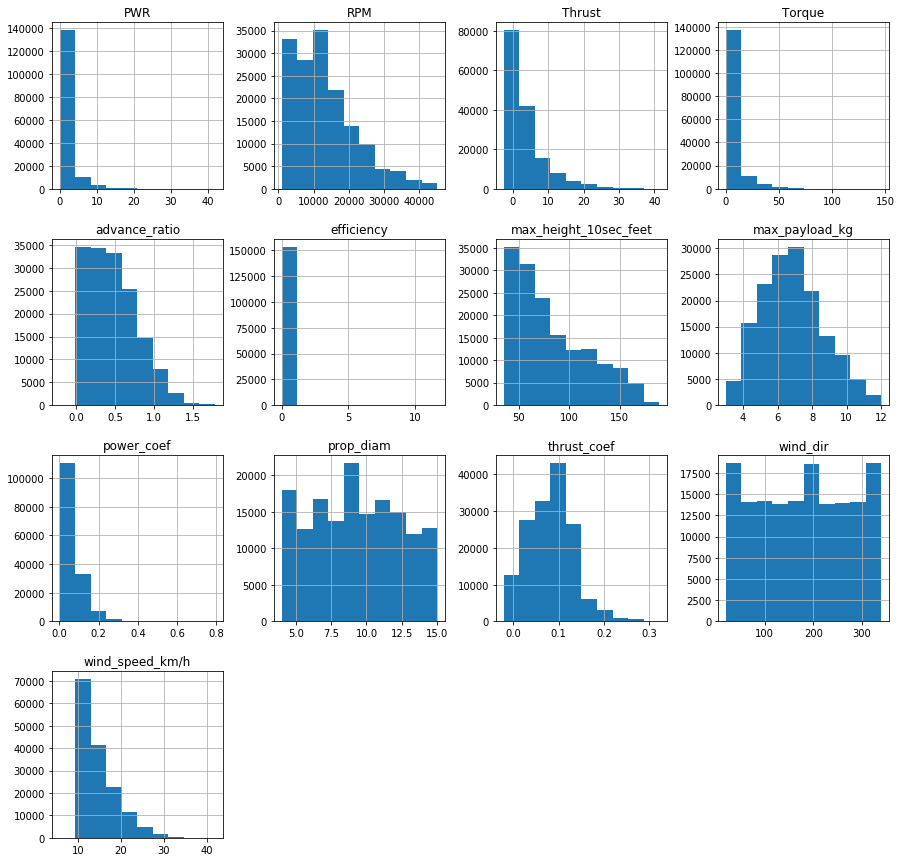

In [351]:
#Visualizing the dataframes
pd.DataFrame.hist(df, figsize = [15,15]); 

In [352]:
df.isnull().sum()

wind_speed_km/h          406
wind_dir                   0
advance_ratio            406
thrust_coef              406
power_coef               406
PWR                      406
Torque                   406
Thrust                   406
RPM                        0
model                      0
prop_diam                  0
max_height_10sec_feet      0
max_payload_kg             0
efficiency               406
dtype: int64

In [353]:
dfa = df
dfa.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM        model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000  PER3_12x6SF         12                     96   
1   0.087   0.094  1000  PER3_12x6SF         12                    138   
2   0.088   0.092  1000  PER3_12x6SF         12                     91   
3   0.088   0.090  1000  PER3_12x6SF         12                    128   
4   0.088   0.088  1000  PER3_12x6SF         12                     85   

   max_payload_kg  efficiency  
0        7.951450      0.0000  
1        9.984433      0.0645  
2        6.251667      0.1262  
3        7.880400      0.1851  
4        7.597923      0.2412

In [354]:
def missing_values_table(df):   #source : https://www.analyticsvidhya.com/blog/2020/06/feature-engineering-guide-data-science-hackathons/
       mis_val = df.isnull().sum()
       mis_val_percent = 100 * df.isnull().sum() / len(df)
       mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
       mis_val_table_ren_columns = mis_val_table.rename(
       columns = {0 : 'Missing Values', 1 : '% of Total Values'})
       mis_val_table_ren_columns = mis_val_table_ren_columns[
           mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
       '% of Total Values', ascending=False).round(1)
       print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"     
           "There are " + str(mis_val_table_ren_columns.shape[0]) +
             " columns that have missing values.")
       return mis_val_table_ren_columns
    
missing_values_table(df) #calling the function

Your selected dataframe has 14 columns.
There are 8 columns that have missing values.


Missing Values  % of Total Values
wind_speed_km/h             406                0.3
advance_ratio               406                0.3
thrust_coef                 406                0.3
power_coef                  406                0.3
PWR                         406                0.3
Torque                      406                0.3
Thrust                      406                0.3
efficiency                  406                0.3

In [355]:
df.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM        model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000  PER3_12x6SF         12                     96   
1   0.087   0.094  1000  PER3_12x6SF         12                    138   
2   0.088   0.092  1000  PER3_12x6SF         12                     91   
3   0.088   0.090  1000  PER3_12x6SF         12                    128   
4   0.088   0.088  1000  PER3_12x6SF         12                     85   

   max_payload_kg  efficiency  
0        7.951450      0.0000  
1        9.984433      0.0645  
2        6.251667      0.1262  
3        7.880400      0.1851  
4        7.597923      0.2412

In [356]:
df=df.dropna()

In [357]:
df1 = df
#df.plot(kind='scatter', x='FIQ_baseline', y='FIQ_24W', figsize=(8,5))

In [358]:
df.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM        model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000  PER3_12x6SF         12                     96   
1   0.087   0.094  1000  PER3_12x6SF         12                    138   
2   0.088   0.092  1000  PER3_12x6SF         12                     91   
3   0.088   0.090  1000  PER3_12x6SF         12                    128   
4   0.088   0.088  1000  PER3_12x6SF         12                     85   

   max_payload_kg  efficiency  
0        7.951450      0.0000  
1        9.984433      0.0645  
2        6.251667      0.1262  
3        7.880400      0.1851  
4        7.597923      0.2412

In [359]:
df1.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM        model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000  PER3_12x6SF         12                     96   
1   0.087   0.094  1000  PER3_12x6SF         12                    138   
2   0.088   0.092  1000  PER3_12x6SF         12                     91   
3   0.088   0.090  1000  PER3_12x6SF         12                    128   
4   0.088   0.088  1000  PER3_12x6SF         12                     85   

   max_payload_kg  efficiency  
0        7.951450      0.0000  
1        9.984433      0.0645  
2        6.251667      0.1262  
3        7.880400      0.1851  
4        7.597923      0.2412

In [360]:
df2 = df

In [361]:
df2.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM        model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000  PER3_12x6SF         12                     96   
1   0.087   0.094  1000  PER3_12x6SF         12                    138   
2   0.088   0.092  1000  PER3_12x6SF         12                     91   
3   0.088   0.090  1000  PER3_12x6SF         12                    128   
4   0.088   0.088  1000  PER3_12x6SF         12                     85   

   max_payload_kg  efficiency  
0        7.951450      0.0000  
1        9.984433      0.0645  
2        6.251667      0.1262  
3        7.880400      0.1851  
4        7.597923      0.2412

In [399]:
df.to_csv('combined_prop_predict1.csv')

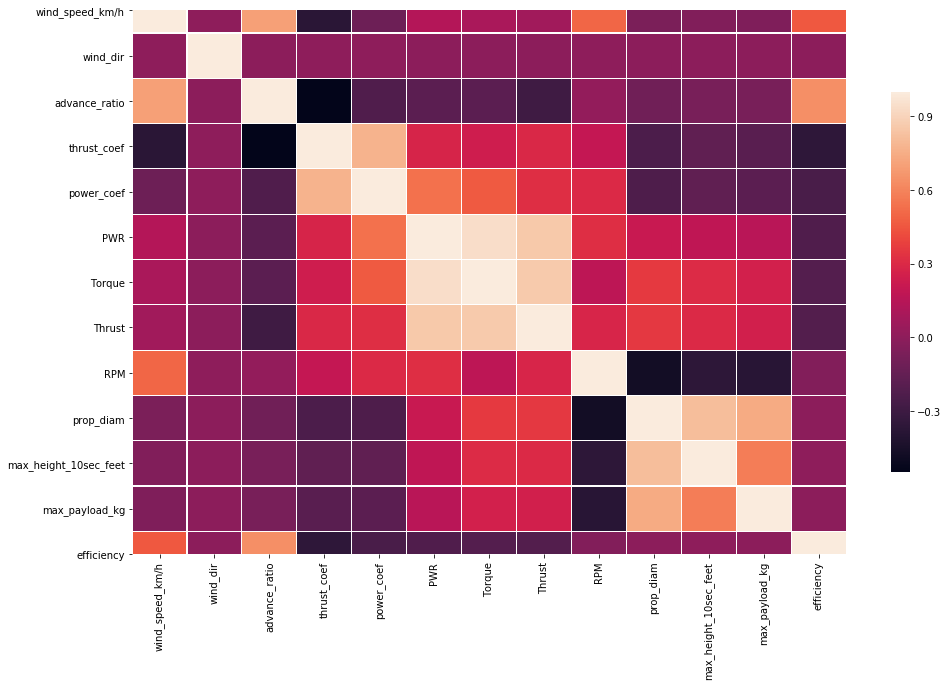

In [363]:
corr = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,  
            linewidths=.08,                   # set linewidth between entries in matrix
           cbar_kws={"shrink": .7})           # set length of legend on right


In [364]:
df.columns

Index(['wind_speed_km/h', 'wind_dir', 'advance_ratio', 'thrust_coef',
       'power_coef', 'PWR', 'Torque', 'Thrust', 'RPM', 'model', 'prop_diam',
       'max_height_10sec_feet', 'max_payload_kg', 'efficiency'],
      dtype='object')

In [365]:
df.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM        model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000  PER3_12x6SF         12                     96   
1   0.087   0.094  1000  PER3_12x6SF         12                    138   
2   0.088   0.092  1000  PER3_12x6SF         12                     91   
3   0.088   0.090  1000  PER3_12x6SF         12                    128   
4   0.088   0.088  1000  PER3_12x6SF         12                     85   

   max_payload_kg  efficiency  
0        7.951450      0.0000  
1        9.984433      0.0645  
2        6.251667      0.1262  
3        7.880400      0.1851  
4        7.597923      0.2412

In [366]:
lb_make = LabelEncoder()
df.model=lb_make.fit_transform(df.model)

In [367]:
df.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM  model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000     77         12                     96   
1   0.087   0.094  1000     77         12                    138   
2   0.088   0.092  1000     77         12                     91   
3   0.088   0.090  1000     77         12                    128   
4   0.088   0.088  1000     77         12                     85   

   max_payload_kg  efficiency  
0        7.951450      0.0000  
1        9.984433      0.0645  
2        6.251667      0.1262  
3        7.880400      0.1851  
4        7.597923      0.2412

In [368]:
df.groupby('model').mean()

wind_speed_km/h    wind_dir  advance_ratio  thrust_coef  power_coef  \
model                                                                        
0            15.870688  176.840149       0.656338     0.099380    0.117389   
1            16.193993  183.758389       0.621527     0.094268    0.101413   
2            12.953014  174.513889       0.249986     0.047743    0.021511   
3            13.600018  181.543860       0.345211     0.074816    0.041084   
4            13.708174  186.318841       0.304957     0.061836    0.031901   
...                ...         ...            ...          ...         ...   
234          15.538343  180.151976       0.569438     0.090700    0.096935   
235          16.562518  178.573508       0.635459     0.098772    0.116720   
236          14.442018  178.877193       0.521158     0.136025    0.103231   
237          15.846757  181.796502       0.626486     0.093782    0.108634   
238          15.755208  180.352564       0.622388     0.103209    0.109925   

            PWR    Torque    Thrust           RPM  prop_diam  \
model                                                          
0      2.027253  8.815099  3.896476   9468.345725       10.0   
1      2.661164  9.924581  4.763518  10587.197987       10.0   
2      0.789713  2.564115  3.393054  12499.958333       10.0   
3      0.801840  3.232284  3.717707  10999.947368       10.0   
4      1.231167  4.001946  4.527199  12869.521739       10.0   
...         ...       ...       ...           ...        ...   
234    1.951985  6.768381  3.485082  11468.039514        9.0   
235    2.853103  9.200799  4.376754  12173.173217        9.0   
236    0.940504  4.031460  3.798067  10000.000000        9.0   
237    1.938669  6.999981  3.300925  10984.054054        9.0   
238    1.806745  6.646705  3.551639  10903.798077        9.0   

       max_height_10sec_feet  max_payload_kg  efficiency  
model                                                     
0                  89.098513        7.595238    0.535792  
1                  89.177852        7.487514    0.546704  
2                  89.208333        7.539040    0.408941  
3                  88.928070        7.487509    0.454787  
4                  89.918841        7.460430    0.450527  
...                      ...             ...         ...  
234                67.243161        7.039480    0.522640  
235                67.368268        7.032512    0.529864  
236                66.350877        6.945928    0.496305  
237                67.351351        6.993033    0.530618  
238                66.243590        6.963540    0.548218  

[239 rows x 13 columns]

In [369]:
dfa.groupby('model').mean()

wind_speed_km/h    wind_dir  advance_ratio  thrust_coef  \
model                                                                   
PER3_10x10          15.870688  176.840149       0.656338     0.099380   
PER3_10x10E         16.193993  183.758389       0.621527     0.094268   
PER3_10x3           12.953014  174.513889       0.249986     0.047743   
PER3_10x38SF        13.600018  181.543860       0.345211     0.074816   
PER3_10x4           13.708174  186.318841       0.304957     0.061836   
...                       ...         ...            ...          ...   
PER3_9x8            15.538343  180.151976       0.569438     0.090700   
PER3_9x85           16.562518  178.573508       0.635459     0.098772   
PER3_9x8E-3         14.442018  179.252971       0.521158     0.136025   
PER3_9x9            15.846757  181.796502       0.626486     0.093782   
PER3_9x9E           15.755208  180.352564       0.622388     0.103209   

              power_coef       PWR    Torque    Thrust           RPM  \
model                                                                  
PER3_10x10      0.117389  2.027253  8.815099  3.896476   9468.345725   
PER3_10x10E     0.101413  2.661164  9.924581  4.763518  10587.197987   
PER3_10x3       0.021511  0.789713  2.564115  3.393054  12499.958333   
PER3_10x38SF    0.041084  0.801840  3.232284  3.717707  10999.947368   
PER3_10x4       0.031901  1.231167  4.001946  4.527199  12869.521739   
...                  ...       ...       ...       ...           ...   
PER3_9x8        0.096935  1.951985  6.768381  3.485082  11468.039514   
PER3_9x85       0.116720  2.853103  9.200799  4.376754  12173.173217   
PER3_9x8E-3     0.103231  0.940504  4.031460  3.798067  10005.093379   
PER3_9x9        0.108634  1.938669  6.999981  3.300925  10984.054054   
PER3_9x9E       0.109925  1.806745  6.646705  3.551639  10903.798077   

              prop_diam  max_height_10sec_feet  max_payload_kg  efficiency  
model                                                                       
PER3_10x10         10.0              89.098513        7.595238    0.535792  
PER3_10x10E        10.0              89.177852        7.487514    0.546704  
PER3_10x3          10.0              89.208333        7.539040    0.408941  
PER3_10x38SF       10.0              88.928070        7.487509    0.454787  
PER3_10x4          10.0              89.918841        7.460430    0.450527  
...                 ...                    ...             ...         ...  
PER3_9x8            9.0              67.243161        7.039480    0.522640  
PER3_9x85           9.0              67.368268        7.032512    0.529864  
PER3_9x8E-3         9.0              66.382003        6.957443    0.496305  
PER3_9x9            9.0              67.351351        6.993033    0.530618  
PER3_9x9E           9.0              66.243590        6.963540    0.548218  

[239 rows x 13 columns]

In [371]:
df['model'].is_unique

False

In [372]:
dfa.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM        model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000  PER3_12x6SF         12                     96   
1   0.087   0.094  1000  PER3_12x6SF         12                    138   
2   0.088   0.092  1000  PER3_12x6SF         12                     91   
3   0.088   0.090  1000  PER3_12x6SF         12                    128   
4   0.088   0.088  1000  PER3_12x6SF         12                     85   

   max_payload_kg  efficiency  
0        7.951450      0.0000  
1        9.984433      0.0645  
2        6.251667      0.1262  
3        7.880400      0.1851  
4        7.597923      0.2412

In [373]:
X = df.drop(['efficiency'], axis = 1).values # X are the input (or independent) variables
y = df['efficiency'].values # y is output (or dependent) variable


In [374]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [375]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [376]:
df.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM  model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000     77         12                     96   
1   0.087   0.094  1000     77         12                    138   
2   0.088   0.092  1000     77         12                     91   
3   0.088   0.090  1000     77         12                    128   
4   0.088   0.088  1000     77         12                     85   

   max_payload_kg  efficiency  
0        7.951450      0.0000  
1        9.984433      0.0645  
2        6.251667      0.1262  
3        7.880400      0.1851  
4        7.597923      0.2412

In [378]:
#Fitting the model
lm = linear_model.LinearRegression()
wind_model = lm.fit(X_train,y_train)

In [379]:
wind_model.score(X_test, y_test)

0.4557349642250097

In [398]:
df.tail()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef  \
154033            27.80       300           0.84       0.0417      0.0481   
154034            28.51       260           0.87       0.0328      0.0417   
154035            29.22       320           0.90       0.0235      0.0351   
154036            29.94       270           0.94       0.0126      0.0271   
154037            30.65       150           0.97       0.0001      0.0180   

          PWR  Torque  Thrust    RPM  model  prop_diam  max_height_10sec_feet  \
154033  3.570   9.001   5.446  25000    229          9                     77   
154034  3.096   7.806   4.279  25000    229          9                     55   
154035  2.608   6.575   3.067  25000    229          9                     87   
154036  2.010   5.068   1.646  25000    229          9                     75   
154037  1.338   3.373   0.009  25000    229          9                     61   

        max_payload_kg  efficiency  
154033        6.297045      0.7240  
154034        6.780330      0.6822  
154035        8.209758      0.6028  
154036        6.574712      0.4351  
154037        6.961049      0.0038

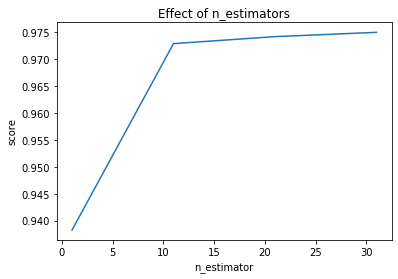

In [407]:

Xa = df.drop(['efficiency','thrust_coef',
       'power_coef', 'PWR','advance_ratio', 'Torque','RPM'], axis = 1).values # X are the input (or independent) variablesmodel = RandomForestRegressor(n_jobs=-1)
y = df['efficiency'].values # y is output (or dependent) variable

X = Xa
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
model = RandomForestRegressor(n_jobs=-1)
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

estimators = np.arange(1, 33, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)



In [408]:
model.score(X_test, y_test)

0.9750048636521522

In [383]:
#model.set_params(n_estimators=12)
#model.fit(X_train, y_train)
#labels=df.drop(['efficiency'],axis=1).columns

In [384]:
#feature selection
labels = df.drop(['efficiency','model', 'thrust_coef',
       'power_coef', 'PWR','advance_ratio', 'Torque','RPM'], axis = 1).columns
result = pd.DataFrame()
result['feature'] = labels
result['importance'] = model.feature_importances_
result.sort_values(by=['importance'], ascending=False, inplace=True)
result

feature  importance
0        wind_speed_km/h    0.460916
2                 Thrust    0.425735
3              prop_diam    0.063448
5         max_payload_kg    0.020044
4  max_height_10sec_feet    0.017204
1               wind_dir    0.012651

In [441]:
filename = 'capstone_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [442]:
loaded_model = pickle.load(open(filename, 'rb'))

In [444]:
pred=pd.read_csv('Book1.csv')

In [445]:
pred.head()

Unnamed: 0  wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  \
0           0            10.00       190           0.00       0.1440   
1           1            10.04        90           0.03       0.1416   
2           2            10.07       250           0.06       0.1390   
3           3            10.11       110           0.09       0.1360   
4           4            10.14       310           0.13       0.1328   

   power_coef    PWR  Torque  Thrust   RPM  model  prop_diam  \
0      0.0690  0.001   0.087   0.095  1000     77         12   
1      0.0693  0.001   0.087   0.094  1000     77         12   
2      0.0694  0.001   0.088   0.092  1000     77         12   
3      0.0695  0.001   0.088   0.090  1000     77         12   
4      0.0694  0.001   0.088   0.088  1000     77         12   

   max_height_10sec_feet  max_payload_kg  
0                     96        7.951450  
1                    138        9.984433  
2                     91        6.251667  
3                    128        7.880400  
4                     85        7.597923

In [446]:
pred=pred[['wind_speed_km/h','wind_dir','advance_ratio','thrust_coef','power_coef','PWR',
       'Torque','Thrust','RPM', 'model', 'prop_diam','max_height_10sec_feet','max_payload_kg']]

In [447]:
pred.head()

wind_speed_km/h  wind_dir  advance_ratio  thrust_coef  power_coef    PWR  \
0            10.00       190           0.00       0.1440      0.0690  0.001   
1            10.04        90           0.03       0.1416      0.0693  0.001   
2            10.07       250           0.06       0.1390      0.0694  0.001   
3            10.11       110           0.09       0.1360      0.0695  0.001   
4            10.14       310           0.13       0.1328      0.0694  0.001   

   Torque  Thrust   RPM  model  prop_diam  max_height_10sec_feet  \
0   0.087   0.095  1000     77         12                     96   
1   0.087   0.094  1000     77         12                    138   
2   0.088   0.092  1000     77         12                     91   
3   0.088   0.090  1000     77         12                    128   
4   0.088   0.088  1000     77         12                     85   

   max_payload_kg  
0        7.951450  
1        9.984433  
2        6.251667  
3        7.880400  
4        7.597923

In [448]:
pred = pred.drop(['thrust_coef',
       'power_coef', 'PWR','advance_ratio', 'Torque','RPM'], axis = 1)

In [449]:
pred.head()

wind_speed_km/h  wind_dir  Thrust  model  prop_diam  max_height_10sec_feet  \
0            10.00       190   0.095     77         12                     96   
1            10.04        90   0.094     77         12                    138   
2            10.07       250   0.092     77         12                     91   
3            10.11       110   0.090     77         12                    128   
4            10.14       310   0.088     77         12                     85   

   max_payload_kg  
0        7.951450  
1        9.984433  
2        6.251667  
3        7.880400  
4        7.597923

In [450]:
y_pred = model.predict(pred) #Using unsaved model

In [451]:
y_pred1 = loaded_model.predict(pred) #Using loaded pickled model

In [452]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[0.46637097 0.46637097 0.46637097 ... 0.62196129 0.62196129 0.62196129]


In [453]:
print('predicted response:', y_pred1, sep='\n')

predicted response:
[0.46637097 0.46637097 0.46637097 ... 0.62196129 0.62196129 0.62196129]


In [419]:
pred['predicted_efficiency'] = y_pred

In [421]:
pred.tail()

wind_speed_km/h  wind_dir  Thrust  model  prop_diam  \
27775            12.31       200  22.975    109         14   
27776            12.89        70  23.001    109         14   
27777            13.46        70  23.018    109         14   
27778            14.04        50  23.049    109         14   
27779            14.62       260  23.090    109         14   

       max_height_10sec_feet  max_payload_kg  predicted_efficiency  
27775                    152       11.079836              0.621961  
27776                    136       10.158418              0.621961  
27777                    140        6.601855              0.621961  
27778                    106        8.688477              0.621961  
27779                    139       10.531373              0.621961

In [ ]:
#le = LabelEncoder()
#for var in categorical_variables:
#      train[var] = le.fit_transform(train[var])

###
### after model building and testing step
###

#predictions_test = le.inverse_transform(prediction_test)

In [ ]:
#lb_make = LabelEncoder()
#df.model=lb_make.fit_transform(df.model)

In [424]:
pred.model = lb_make.inverse_transform(pred.model)

In [425]:
pred.head()

wind_speed_km/h  wind_dir  Thrust        model  prop_diam  \
0            10.00       190   0.095  PER3_12x6SF         12   
1            10.04        90   0.094  PER3_12x6SF         12   
2            10.07       250   0.092  PER3_12x6SF         12   
3            10.11       110   0.090  PER3_12x6SF         12   
4            10.14       310   0.088  PER3_12x6SF         12   

   max_height_10sec_feet  max_payload_kg  predicted_efficiency  
0                     96        7.951450              0.466371  
1                    138        9.984433              0.466371  
2                     91        6.251667              0.466371  
3                    128        7.880400              0.466371  
4                     85        7.597923              0.466371

In [426]:
pred.tail()

wind_speed_km/h  wind_dir  Thrust       model  prop_diam  \
27775            12.31       200  22.975  PER3_14x10         14   
27776            12.89        70  23.001  PER3_14x10         14   
27777            13.46        70  23.018  PER3_14x10         14   
27778            14.04        50  23.049  PER3_14x10         14   
27779            14.62       260  23.090  PER3_14x10         14   

       max_height_10sec_feet  max_payload_kg  predicted_efficiency  
27775                    152       11.079836              0.621961  
27776                    136       10.158418              0.621961  
27777                    140        6.601855              0.621961  
27778                    106        8.688477              0.621961  
27779                    139       10.531373              0.621961

In [427]:
pred_sort = pred.sort_values(by=['predicted_efficiency'], inplace=True, ascending=False)

In [429]:
pred_sort

In [430]:
pred1 = pred.groupby(['predicted_efficiency'])

In [431]:
pred1.head()

wind_speed_km/h  wind_dir  Thrust         model  prop_diam  \
3472             30.65       260  -1.817    PER3_12x9W         12   
26990            24.95       300  -1.235     PER3_14x7         14   
6579             19.69       290   3.083   PER3_12x12E         12   
18929            11.59       180   3.090   PER3_13x13N         13   
25815            16.55        80   3.071    PER3_14x6E         14   
...                ...       ...     ...           ...        ...   
10658            20.54        70  -0.098  PER3_12x47SF         12   
7303             35.94       190  -0.164   PER3_12x12N         12   
7782             36.81       310  -0.453    PER3_12x13         12   
12153            36.66       120  -0.429   PER3_12x125         12   
17548            31.61       310  -0.346   PER3_13x10E         13   

       max_height_10sec_feet  max_payload_kg  predicted_efficiency  
3472                      87        8.646750              4.456265  
26990                    173        7.700012              4.456265  
6579                     112       10.367040              0.760003  
18929                    119        6.739372              0.760003  
25815                     94        8.809619              0.760003  
...                      ...             ...                   ...  
10658                    120        6.217588              0.453932  
7303                     152        6.138106              0.452223  
7782                     115        8.737833              0.429990  
12153                    156        5.831151              0.426335  
17548                     91        7.021835              0.381294  

[1076 rows x 8 columns]

In [434]:
pred2 = pred.groupby(['model'])

In [435]:
pred2.head()

wind_speed_km/h  wind_dir  Thrust         model  prop_diam  \
3472             30.65       260  -1.817    PER3_12x9W         12   
26990            24.95       300  -1.235     PER3_14x7         14   
6579             19.69       290   3.083   PER3_12x12E         12   
18929            11.59       180   3.090   PER3_13x13N         13   
25815            16.55        80   3.071    PER3_14x6E         14   
...                ...       ...     ...           ...        ...   
27513            12.14       150   1.939    PER3_14x10         14   
16728            13.39       310   1.955    PER3_13x10         13   
27615            17.50       200   2.107    PER3_14x10         14   
27509            11.43       150   2.104    PER3_14x10         14   
18683            23.00       310   2.093  PER3_13x13-4         13   

       max_height_10sec_feet  max_payload_kg  predicted_efficiency  
3472                      87        8.646750              4.456265  
26990                    173        7.700012              4.456265  
6579                     112       10.367040              0.760003  
18929                    119        6.739372              0.760003  
25815                     94        8.809619              0.760003  
...                      ...             ...                   ...  
27513                    166        8.040563              0.746090  
16728                    143       11.132567              0.746090  
27615                    140        6.745554              0.744832  
27509                    165        6.553760              0.744832  
18683                    151        5.851545              0.744671  

[290 rows x 8 columns]

In [438]:
pred1.count()

wind_speed_km/h  wind_dir  Thrust  model  prop_diam  \
predicted_efficiency                                                        
0.381294                            1         1       1      1          1   
0.426335                            1         1       1      1          1   
0.429990                            1         1       1      1          1   
0.452223                            1         1       1      1          1   
0.453932                            6         6       6      6          6   
...                               ...       ...     ...    ...        ...   
0.753335                           26        26      26     26         26   
0.755545                           23        23      23     23         23   
0.759503                           39        39      39     39         39   
0.760003                           82        82      82     82         82   
4.456265                            2         2       2      2          2   

                      max_height_10sec_feet  max_payload_kg  
predicted_efficiency                                         
0.381294                                  1               1  
0.426335                                  1               1  
0.429990                                  1               1  
0.452223                                  1               1  
0.453932                                  6               6  
...                                     ...             ...  
0.753335                                 26              26  
0.755545                                 23              23  
0.759503                                 39              39  
0.760003                                 82              82  
4.456265                                  2               2  

[226 rows x 7 columns]

In [439]:
pred2.count()

wind_speed_km/h  wind_dir  Thrust  prop_diam  \
model                                                              
PER3_12x10                      480       480     480        480   
PER3_12x10E                     508       508     508        508   
PER3_12x10W                     479       479     479        479   
PER3_12x11                      477       477     477        477   
PER3_12x115                     417       417     417        417   
PER3_12x11N                     450       450     450        450   
PER3_12x12                      450       450     450        450   
PER3_12x125                     450       450     450        450   
PER3_12x12E                     479       479     479        479   
PER3_12x12N                     508       508     508        508   
PER3_12x13                      479       479     479        479   
PER3_12x13N                     480       480     480        480   
PER3_12x14                      478       478     478        478   
PER3_12x38SF                    478       478     478        478   
PER3_12x45MR                    540       540     540        540   
PER3_12x47SF                    450       450     450        450   
PER3_12x55MR                    540       540     540        540   
PER3_12x65WEP(F2B)              538       538     538        538   
PER3_12x6SF                     480       480     480        480   
PER3_12x7                       510       510     510        510   
PER3_12x8                       510       510     510        510   
PER3_12x8E                      510       510     510        510   
PER3_12x8SF                     449       449     449        449   
PER3_12x9                       509       509     509        509   
PER3_12x9W                      505       505     505        505   
PER3_13x10                      419       419     419        419   
PER3_13x10E                     538       538     538        538   
PER3_13x10F                     447       447     447        447   
PER3_13x11                      420       420     420        420   
PER3_13x13-4                    358       358     358        358   
PER3_13x135N                    479       479     479        479   
PER3_13x13N                     480       480     480        480   
PER3_13x14                      390       390     390        390   
PER3_13x4                       510       510     510        510   
PER3_13x45EP                    540       540     540        540   
PER3_13x45EP(F2B)               540       540     540        540   
PER3_13x45MR                    510       510     510        510   
PER3_13x47SF                    420       420     420        420   
PER3_13x4E                      480       480     480        480   
PER3_13x4W                      510       510     510        510   
PER3_13x55E                     510       510     510        510   
PER3_13x55MR                    480       480     480        480   
PER3_13x6                       510       510     510        510   
PER3_13x65E                     480       480     480        480   
PER3_13x65E(F2B)                480       480     480        480   
PER3_13x7                       450       450     450        450   
PER3_13x7F                      540       540     540        540   
PER3_13x8                       480       480     480        480   
PER3_13x8E                      508       508     508        508   
PER3_13x9                       450       450     450        450   
PER3_14x10                      369       369     369        369   
PER3_14x4W                      480       480     480        480   
PER3_14x5N                      480       480     480        480   
PER3_14x6                       479       479     479        479   
PER3_14x6E                      510       510     510        510   
PER3_14x7                       449       449     449        449   
PER3_14x7E                      510       510     510        510   
PER3_14x

I did some analysis and discovered we need adv ratio and thrust/thrust coefficient to get a good score!!!!. If you remove the respective coolumns. the score will be low